Tasca 7 : Transformació Registre Log amb Regular expressions

- Exercici 1

Normalitza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que trobaràs al repositori de GitHub "Data-sources". 

In [1]:
import pandas as pd
import re
from jinja2 import Template
import requests
import json
import os
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_colwidth', None)
original = pd.read_csv('Web_access_log-akumenius.com.txt', sep='delimiter', header=None, engine='python')
original.head()

,0
0,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"
1,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"
2,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"
3,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"
4,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"


 - Exercici 2

Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web. 

In [3]:
logs=original.copy()

Extraigo el IP

In [4]:
log_limpio=logs[0].str.extract(r'(\d+\.\d+\.\d+\.\d+)')


In [5]:
log_limpio

,0
0,127.0.0.1
1,127.0.0.1
2,127.0.0.1
3,127.0.0.1
4,127.0.0.1
...,...
261868,5.255.253.53
261869,74.86.158.107
261870,127.0.0.1
261871,127.0.0.1


Extraigo el host

In [6]:

log_limpio['HOST']=logs[0].str.extract(r'^([A-Za-z\.]+)')


In [7]:
log_limpio

,0,HOST
0,127.0.0.1,localhost
1,127.0.0.1,localhost
2,127.0.0.1,localhost
3,127.0.0.1,localhost
4,127.0.0.1,localhost
...,...,...
261868,5.255.253.53,www.akumenius.com
261869,74.86.158.107,www.akumenius.com
261870,127.0.0.1,localhost
261871,127.0.0.1,localhost


Extraigo fechas

In [8]:
log_limpio['FECHA']=logs[0].str.extract(r'(?P<Fecha>\[\d{2}/\w+/\d{4}[:\d\d]+\s.\d{4}])')


In [9]:
log_limpio.head()

,0,HOST,FECHA
0,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100]
1,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100]
2,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100]
3,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100]
4,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100]


Renombro primera columna


In [10]:
log_limpio.rename(columns={ log_limpio.columns[0]: "IP" }, inplace = True)

In [11]:
log_limpio.head()

,IP,HOST,FECHA
0,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100]
1,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100]
2,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100]
3,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100]
4,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100]


Extraigo la peticion

In [12]:
log_limpio['Peticion']=logs[0].str.extract(r'"(.+)"\s\d+') 


In [13]:
log_limpio

,IP,HOST,FECHA,Peticion
0,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100],OPTIONS * HTTP/1.0
1,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100],OPTIONS * HTTP/1.0
2,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100],OPTIONS * HTTP/1.0
3,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100],OPTIONS * HTTP/1.0
4,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100],OPTIONS * HTTP/1.0
...,...,...,...,...
261868,5.255.253.53,www.akumenius.com,[02/Mar/2014:03:05:39 +0100],GET / HTTP/1.1
261869,74.86.158.107,www.akumenius.com,[02/Mar/2014:03:09:52 +0100],HEAD / HTTP/1.1
261870,127.0.0.1,localhost,[02/Mar/2014:03:10:18 +0100],OPTIONS * HTTP/1.0
261871,127.0.0.1,localhost,[02/Mar/2014:03:10:18 +0100],OPTIONS * HTTP/1.0


Parseo la columna peticion

In [14]:
log_limpio[['Peticio', 'Pet','Protocol']] = log_limpio['Peticion'].str.split(' ', 0, expand=True)

In [15]:
log_limpio.head()

,IP,HOST,FECHA,Peticion,Peticio,Pet,Protocol
0,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100],OPTIONS * HTTP/1.0,OPTIONS,*,HTTP/1.0
1,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100],OPTIONS * HTTP/1.0,OPTIONS,*,HTTP/1.0
2,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100],OPTIONS * HTTP/1.0,OPTIONS,*,HTTP/1.0
3,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100],OPTIONS * HTTP/1.0,OPTIONS,*,HTTP/1.0
4,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100],OPTIONS * HTTP/1.0,OPTIONS,*,HTTP/1.0


In [16]:
del log_limpio["Peticion"]


Saco la respuesta del server

In [17]:
log_limpio['ServerRespCode']=logs[0].str.extract(r'"\s(\d{3})\s') 


In [18]:
log_limpio.head()

,IP,HOST,FECHA,Peticio,Pet,Protocol,ServerRespCode
0,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100],OPTIONS,*,HTTP/1.0,200
1,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100],OPTIONS,*,HTTP/1.0,200
2,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100],OPTIONS,*,HTTP/1.0,200
3,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100],OPTIONS,*,HTTP/1.0,200
4,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100],OPTIONS,*,HTTP/1.0,200


Extraigo la informacion relativa al cliente

In [19]:
log_limpio['Client']=logs[0].str.extract(r'(?P<Client>[^"]*)" VLOG=-$')

In [20]:
log_limpio

,IP,HOST,FECHA,Peticio,Pet,Protocol,ServerRespCode,Client
0,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100],OPTIONS,*,HTTP/1.0,200,Apache (internal dummy connection)
1,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100],OPTIONS,*,HTTP/1.0,200,Apache (internal dummy connection)
2,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100],OPTIONS,*,HTTP/1.0,200,Apache (internal dummy connection)
3,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100],OPTIONS,*,HTTP/1.0,200,Apache (internal dummy connection)
4,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100],OPTIONS,*,HTTP/1.0,200,Apache (internal dummy connection)
...,...,...,...,...,...,...,...,...
261868,5.255.253.53,www.akumenius.com,[02/Mar/2014:03:05:39 +0100],GET,/,HTTP/1.1,200,Mozilla/5.0 (compatible; YandexBot/3.0; +http://yandex.com/bots)
261869,74.86.158.107,www.akumenius.com,[02/Mar/2014:03:09:52 +0100],HEAD,/,HTTP/1.1,200,Mozilla/5.0+(compatible; UptimeRobot/2.0; http://www.uptimerobot.com/)
261870,127.0.0.1,localhost,[02/Mar/2014:03:10:18 +0100],OPTIONS,*,HTTP/1.0,200,Apache (internal dummy connection)
261871,127.0.0.1,localhost,[02/Mar/2014:03:10:18 +0100],OPTIONS,*,HTTP/1.0,200,Apache (internal dummy connection)


Extraigo los bytes recibidos

In [21]:
log_limpio['RevBytes']=logs[0].str.extract(r'\d\s(-|\d+)\s"')

In [22]:
log_limpio

,IP,HOST,FECHA,Peticio,Pet,Protocol,ServerRespCode,Client,RevBytes
0,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100],OPTIONS,*,HTTP/1.0,200,Apache (internal dummy connection),-
1,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100],OPTIONS,*,HTTP/1.0,200,Apache (internal dummy connection),-
2,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100],OPTIONS,*,HTTP/1.0,200,Apache (internal dummy connection),-
3,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100],OPTIONS,*,HTTP/1.0,200,Apache (internal dummy connection),-
4,127.0.0.1,localhost,[23/Feb/2014:03:10:31 +0100],OPTIONS,*,HTTP/1.0,200,Apache (internal dummy connection),-
...,...,...,...,...,...,...,...,...,...
261868,5.255.253.53,www.akumenius.com,[02/Mar/2014:03:05:39 +0100],GET,/,HTTP/1.1,200,Mozilla/5.0 (compatible; YandexBot/3.0; +http://yandex.com/bots),7528
261869,74.86.158.107,www.akumenius.com,[02/Mar/2014:03:09:52 +0100],HEAD,/,HTTP/1.1,200,Mozilla/5.0+(compatible; UptimeRobot/2.0; http://www.uptimerobot.com/),-
261870,127.0.0.1,localhost,[02/Mar/2014:03:10:18 +0100],OPTIONS,*,HTTP/1.0,200,Apache (internal dummy connection),-
261871,127.0.0.1,localhost,[02/Mar/2014:03:10:18 +0100],OPTIONS,*,HTTP/1.0,200,Apache (internal dummy connection),-


Resumen de los datos

In [42]:
log_limpio.describe()

,IP,HOST,FECHA,Peticio,Pet,Protocol,ServerRespCode,Client,RevBytes
count,261873,261873,261873,261873,261831,261831,261873,261873,261873
unique,2921,5,118735,6,66082,2,12,735,15548
top,66.249.76.216,www.akumenius.com,[28/Feb/2014:04:16:25 +0100],GET,*,HTTP/1.1,200,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html),-
freq,46382,232300,83,229482,13892,241991,226382,50914,42335


In [43]:
log_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261873 entries, 0 to 261872
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   IP              261873 non-null  object
 1   HOST            261873 non-null  object
 2   FECHA           261873 non-null  object
 3   Peticio         261873 non-null  object
 4   Pet             261831 non-null  object
 5   Protocol        261831 non-null  object
 6   ServerRespCode  261873 non-null  object
 7   Client          261873 non-null  object
 8   RevBytes        261873 non-null  object
dtypes: object(9)
memory usage: 18.0+ MB


- Exercici 3

Geolocalitza les IP's. Aquí tens una pàgina d'interès :

Elimino los IP duplicados y obtengo datos del servicio

In [47]:
ips=log_limpio["IP"].unique()

In [48]:
ipapi = os.getenv('ipapi')


In [49]:
tm = Template("http://api.ipapi.com/{{IP}}?access_key={{IPAPI}}")

In [50]:
ips = np.delete(ips, np.argwhere(ips == '127.0.0.1'))

In [51]:
len(ips)

2920

In [53]:
geoIp=[]
for ip in ips:
    try:
        msg = tm.render(IP=ip,IPAPI=ipapi)
        html_txt = requests.get(msg)
        loaded_json = json.loads(html_txt.text)
        geoIp.append(eval(str(loaded_json)))
    except ValueError:
        pass
    except TypeError:
        pass

In [54]:
len(geoIp)

2920

Transformo los datos en dataframe de pandas

In [55]:
iplist = pd.DataFrame.from_dict(geoIp)


In [60]:
iplist.head()

,Unnamed: 0,ip,type,continent_code,continent_name,country_code,country_name,region_code,region_name,city,zip,latitude,longitude,location
0,0,66.249.76.216,ipv4,NaN,North America,US,United States,CA,California,Mountain View,94043,37.419159,-122.075409,"{'geoname_id': 5375480, 'capital': 'Washington D.C.', 'languages': [{'code': 'en', 'name': 'English', 'native': 'English'}], 'country_flag': 'http://assets.ipapi.com/flags/us.svg', 'country_flag_emoji': '🇺🇸', 'country_flag_emoji_unicode': 'U+1F1FA U+1F1F8', 'calling_code': '1', 'is_eu': False}"
1,1,5.255.253.53,ipv4,AS,Asia,RU,Russia,MOW,Moscow,Moscow,119021,55.734909,37.589031,"{'geoname_id': 524901, 'capital': 'Moscow', 'languages': [{'code': 'ru', 'name': 'Russian', 'native': 'Русский'}], 'country_flag': 'http://assets.ipapi.com/flags/ru.svg', 'country_flag_emoji': '🇷🇺', 'country_flag_emoji_unicode': 'U+1F1F7 U+1F1FA', 'calling_code': '7', 'is_eu': False}"
2,2,157.55.35.112,ipv4,NaN,North America,US,United States,WA,Washington,Quincy,98848,47.206032,-119.799339,"{'geoname_id': None, 'capital': 'Washington D.C.', 'languages': [{'code': 'en', 'name': 'English', 'native': 'English'}], 'country_flag': 'http://assets.ipapi.com/flags/us.svg', 'country_flag_emoji': '🇺🇸', 'country_flag_emoji_unicode': 'U+1F1FA U+1F1F8', 'calling_code': '1', 'is_eu': False}"
3,3,193.111.141.116,ipv4,EU,Europe,DE,Germany,NW,North Rhine-Westphalia,Erkrath,40472,51.257809,6.907920,"{'geoname_id': 2929600, 'capital': 'Berlin', 'languages': [{'code': 'de', 'name': 'German', 'native': 'Deutsch'}], 'country_flag': 'http://assets.ipapi.com/flags/de.svg', 'country_flag_emoji': '🇩🇪', 'country_flag_emoji_unicode': 'U+1F1E9 U+1F1EA', 'calling_code': '49', 'is_eu': True}"
4,4,5.10.83.71,ipv4,EU,Europe,NL,Netherlands,NH,North Holland,Diemen,1096,52.337898,4.922070,"{'geoname_id': 2756888, 'capital': 'Amsterdam', 'languages': [{'code': 'nl', 'name': 'Dutch', 'native': 'Nederlands'}], 'country_flag': 'http://assets.ipapi.com/flags/nl.svg', 'country_flag_emoji': '🇳🇱', 'country_flag_emoji_unicode': 'U+1F1F3 U+1F1F1', 'calling_code': '31', 'is_eu': True}"


Guardo los datos en csv

In [ ]:
iplist.to_csv("iplistcsv.csv")

In [23]:
iplistfcsv = pd.read_csv('iplistcsv.csv')


In [58]:
iplistfcsv.head()

,Unnamed: 0,ip,type,continent_code,continent_name,country_code,country_name,region_code,region_name,city,zip,latitude,longitude,location
0,0,66.249.76.216,ipv4,NaN,North America,US,United States,CA,California,Mountain View,94043,37.419159,-122.075409,"{'geoname_id': 5375480, 'capital': 'Washington D.C.', 'languages': [{'code': 'en', 'name': 'English', 'native': 'English'}], 'country_flag': 'http://assets.ipapi.com/flags/us.svg', 'country_flag_emoji': '🇺🇸', 'country_flag_emoji_unicode': 'U+1F1FA U+1F1F8', 'calling_code': '1', 'is_eu': False}"
1,1,5.255.253.53,ipv4,AS,Asia,RU,Russia,MOW,Moscow,Moscow,119021,55.734909,37.589031,"{'geoname_id': 524901, 'capital': 'Moscow', 'languages': [{'code': 'ru', 'name': 'Russian', 'native': 'Русский'}], 'country_flag': 'http://assets.ipapi.com/flags/ru.svg', 'country_flag_emoji': '🇷🇺', 'country_flag_emoji_unicode': 'U+1F1F7 U+1F1FA', 'calling_code': '7', 'is_eu': False}"
2,2,157.55.35.112,ipv4,NaN,North America,US,United States,WA,Washington,Quincy,98848,47.206032,-119.799339,"{'geoname_id': None, 'capital': 'Washington D.C.', 'languages': [{'code': 'en', 'name': 'English', 'native': 'English'}], 'country_flag': 'http://assets.ipapi.com/flags/us.svg', 'country_flag_emoji': '🇺🇸', 'country_flag_emoji_unicode': 'U+1F1FA U+1F1F8', 'calling_code': '1', 'is_eu': False}"
3,3,193.111.141.116,ipv4,EU,Europe,DE,Germany,NW,North Rhine-Westphalia,Erkrath,40472,51.257809,6.907920,"{'geoname_id': 2929600, 'capital': 'Berlin', 'languages': [{'code': 'de', 'name': 'German', 'native': 'Deutsch'}], 'country_flag': 'http://assets.ipapi.com/flags/de.svg', 'country_flag_emoji': '🇩🇪', 'country_flag_emoji_unicode': 'U+1F1E9 U+1F1EA', 'calling_code': '49', 'is_eu': True}"
4,4,5.10.83.71,ipv4,EU,Europe,NL,Netherlands,NH,North Holland,Diemen,1096,52.337898,4.922070,"{'geoname_id': 2756888, 'capital': 'Amsterdam', 'languages': [{'code': 'nl', 'name': 'Dutch', 'native': 'Nederlands'}], 'country_flag': 'http://assets.ipapi.com/flags/nl.svg', 'country_flag_emoji': '🇳🇱', 'country_flag_emoji_unicode': 'U+1F1F3 U+1F1F1', 'calling_code': '31', 'is_eu': True}"


In [25]:
descIp=iplistfcsv[['ip','country_name','city','latitude','longitude']]

In [26]:
descIp

,ip,country_name,city,latitude,longitude
0,66.249.76.216,United States,Mountain View,37.419159,-122.075409
1,5.255.253.53,Russia,Moscow,55.734909,37.589031
2,157.55.35.112,United States,Quincy,47.206032,-119.799339
3,193.111.141.116,Germany,Erkrath,51.257809,6.907920
4,5.10.83.71,Netherlands,Diemen,52.337898,4.922070
...,...,...,...,...,...
2915,46.222.83.180,Spain,Madrid,40.426182,-3.685140
2916,79.155.78.117,Spain,Adeje,28.107599,-16.729900
2917,217.174.248.179,United Kingdom,Gloucester,51.858330,-2.218610
2918,188.135.173.80,Italy,Montebelluna,45.825699,12.054380


In [27]:

logGeoDesc = pd.merge(left=log_limpio, right=descIp, left_on='IP', right_on='ip' )

In [28]:
logGeoDesc

,IP,HOST,FECHA,Peticio,Pet,Protocol,ServerRespCode,Client,RevBytes,ip,country_name,city,latitude,longitude
0,66.249.76.216,www.akumenius.com,[23/Feb/2014:03:10:31 +0100],GET,/hoteles-baratos/ofertas-hotel-Club-&-Hotel-Letoonia--en-Fethiye-8460b-destinos.html,HTTP/1.1,404,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html),3100,66.249.76.216,United States,Mountain View,37.419159,-122.075409
1,66.249.76.216,www.akumenius.com,[23/Feb/2014:03:10:33 +0100],GET,/hoteles-baratos/ofertas-hotel-Metropolis-Hotel-en-Kaunas-210244b-destinos.html,HTTP/1.1,404,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html),3100,66.249.76.216,United States,Mountain View,37.419159,-122.075409
2,66.249.76.216,www.akumenius.com,[23/Feb/2014:03:10:35 +0100],GET,/hoteles-baratos/ofertas-hotel-Faena-Hotel-Buenos-Aires-en-Downtown-129723b-destinos.html,HTTP/1.1,404,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html),3100,66.249.76.216,United States,Mountain View,37.419159,-122.075409
3,66.249.76.216,www.akumenius.com,[23/Feb/2014:03:10:38 +0100],GET,/hoteles-baratos/ofertas-hotel-Kensington-Townhouse-London-en-Kensington-54356b-destinos.html,HTTP/1.1,404,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html),3100,66.249.76.216,United States,Mountain View,37.419159,-122.075409
4,66.249.76.216,www.akumenius.com,[23/Feb/2014:03:10:39 +0100],GET,/destinos-baratos/destinosEstrelles/hoteles-en-Invermere_CANAD%C3%81-con-4-estrellas,HTTP/1.1,200,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html),8811,66.249.76.216,United States,Mountain View,37.419159,-122.075409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247976,217.174.248.179,localhost,[02/Mar/2014:02:34:43 +0100],POST,/cgi-bin/php4?%2D%64+%61%6C%6C%6F%77%5F%75%72%6C%5F%69%6E%63%6C%75%64%65%3D%6F%6E+%2D%64+%73%61%66%65%5F%6D%6F%64%65%3D%6F%66%66+%2D%64+%73%75%68%6F%73%69%6E%2E%73%69%6D%75%6C%61%74%69%6F%6E%3D%6F%6E+%2D%64+%64%69%73%61%62%6C%65%5F%66%75%6E%63%74%69%6F%6E%73%3D%22%22+%2D%64+%6F%70%65%6E%5F%62%61%73%65%64%69%72%3D%6E%6F%6E%65+%2D%64+%61%75%74%6F%5F%70%72%65%70%65%6E%64%5F%66%69%6C%65%3D%70%68%70%3A%2F%2F%69%6E%70%75%74+%2D%64+%63%67%69%2E%66%6F%72%63%65%5F%72%65%64%69%72%65%63%74%3D%30+%2D%64+%63%67%69%2E%72%65%64%69%72%65%63%74%5F%73%74%61%74%75%73%5F%65%6E%76%3D%30+%2D%6E,HTTP/1.1,403,"Mozilla/5.0 (iPad; CPU OS 6_0 like Mac OS X) AppleWebKit/536.26(KHTML, like Gecko) Version/6.0 Mobile/10A5355d Safari/8536.25",278,217.174.248.179,United Kingdom,Gloucester,51.858330,-2.218610
247977,217.174.248.179,localhost,[02/Mar/2014:02:34:43 +0100],POST,/?%2D%64+%61%6C%6C%6F%77%5F%75%72%6C%5F%69%6E%63%6C%75%64%65%3D%6F%6E+%2D%64+%73%61%66%65%5F%6D%6F%64%65%3D%6F%66%66+%2D%64+%73%75%68%6F%73%69%6E%2E%73%69%6D%75%6C%61%74%69%6F%6E%3D%6F%6E+%2D%64+%64%69%73%61%62%6C%65%5F%66%75%6E%63%74%69%6F%6E%73%3D%22%22+%2D%64+%6F%70%65%6E%5F%62%61%73%65%64%69%72%3D%6E%6F%6E%65+%2D%64+%61%75%74%6F%5F%70%72%65%70%65%6E%64%5F%66%69%6C%65%3D%70%68%70%3A%2F%2F%69%6E%70%75%74+%2D%64+%63%67%69%2E%66%6F%72%63%65%5F%72%65%64%69%72%65%63%74%3D%30+%2D%64+%63%67%69%2E%72%65%64%69%72%65%63%74%5F%73%74%61%74%75%73%5F%65%6E%76%3D%30+%2D%6E,HTTP/1.1,403,"Mozilla/5.0 (iPad; CPU OS 6_0 like Mac OS X) AppleWebKit/536.26(KHTML, like Gecko) Version/6.0 Mobile/10A5355d Safari/8536.25",266,217.174.248.179,United Kingdom,Gloucester,51.858330,-2.218610
247978,188.135.173.80,www.akumenius.com,[02/Mar/2014:02:44:08 +0100],GET,/destinos-baratos/hoteles-en-Alvor_PORTUGAL,HTTP/1.0,200,"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1500.71 Safari/537.36",21144,188.135.173.80,Italy,Montebelluna,45.825699,12.054380
247979,188.135.173.80,www.akumenius.com,[02/Mar/2014:02:44:09 +0100],GET,/destinos-baratos/hoteles-baratos/ofertas-hotel-Pestana-Alvor-Atlantico-Residences-Beach-Suites-en-Alvor_PORTUGAL-1873b-destinos.html,HTTP/1.0,200,"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.

In [85]:
geometry = [Point(xy) for xy in zip(logGeoDesc.longitude, logGeoDesc.latitude)]


In [89]:
gdf = gpd.GeoDataFrame(logGeoDesc, crs="EPSG:4326", geometry=geometry)

,IP,HOST,FECHA,Peticio,Pet,Protocol,ServerRespCode,Client,RevBytes,ip,country_name,city,latitude,longitude,geometry
0,66.249.76.216,www.akumenius.com,[23/Feb/2014:03:10:31 +0100],GET,/hoteles-baratos/ofertas-hotel-Club-&-Hotel-Letoonia--en-Fethiye-8460b-destinos.html,HTTP/1.1,404,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html),3100,66.249.76.216,United States,Mountain View,37.419159,-122.075409,POINT (-122.07541 37.41916)
1,66.249.76.216,www.akumenius.com,[23/Feb/2014:03:10:33 +0100],GET,/hoteles-baratos/ofertas-hotel-Metropolis-Hotel-en-Kaunas-210244b-destinos.html,HTTP/1.1,404,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html),3100,66.249.76.216,United States,Mountain View,37.419159,-122.075409,POINT (-122.07541 37.41916)
2,66.249.76.216,www.akumenius.com,[23/Feb/2014:03:10:35 +0100],GET,/hoteles-baratos/ofertas-hotel-Faena-Hotel-Buenos-Aires-en-Downtown-129723b-destinos.html,HTTP/1.1,404,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html),3100,66.249.76.216,United States,Mountain View,37.419159,-122.075409,POINT (-122.07541 37.41916)
3,66.249.76.216,www.akumenius.com,[23/Feb/2014:03:10:38 +0100],GET,/hoteles-baratos/ofertas-hotel-Kensington-Townhouse-London-en-Kensington-54356b-destinos.html,HTTP/1.1,404,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html),3100,66.249.76.216,United States,Mountain View,37.419159,-122.075409,POINT (-122.07541 37.41916)
4,66.249.76.216,www.akumenius.com,[23/Feb/2014:03:10:39 +0100],GET,/destinos-baratos/destinosEstrelles/hoteles-en-Invermere_CANAD%C3%81-con-4-estrellas,HTTP/1.1,200,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html),8811,66.249.76.216,United States,Mountain View,37.419159,-122.075409,POINT (-122.07541 37.41916)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247976,217.174.248.179,localhost,[02/Mar/2014:02:34:43 +0100],POST,/cgi-bin/php4?%2D%64+%61%6C%6C%6F%77%5F%75%72%6C%5F%69%6E%63%6C%75%64%65%3D%6F%6E+%2D%64+%73%61%66%65%5F%6D%6F%64%65%3D%6F%66%66+%2D%64+%73%75%68%6F%73%69%6E%2E%73%69%6D%75%6C%61%74%69%6F%6E%3D%6F%6E+%2D%64+%64%69%73%61%62%6C%65%5F%66%75%6E%63%74%69%6F%6E%73%3D%22%22+%2D%64+%6F%70%65%6E%5F%62%61%73%65%64%69%72%3D%6E%6F%6E%65+%2D%64+%61%75%74%6F%5F%70%72%65%70%65%6E%64%5F%66%69%6C%65%3D%70%68%70%3A%2F%2F%69%6E%70%75%74+%2D%64+%63%67%69%2E%66%6F%72%63%65%5F%72%65%64%69%72%65%63%74%3D%30+%2D%64+%63%67%69%2E%72%65%64%69%72%65%63%74%5F%73%74%61%74%75%73%5F%65%6E%76%3D%30+%2D%6E,HTTP/1.1,403,"Mozilla/5.0 (iPad; CPU OS 6_0 like Mac OS X) AppleWebKit/536.26(KHTML, like Gecko) Version/6.0 Mobile/10A5355d Safari/8536.25",278,217.174.248.179,United Kingdom,Gloucester,51.858330,-2.218610,POINT (-2.21861 51.85833)
247977,217.174.248.179,localhost,[02/Mar/2014:02:34:43 +0100],POST,/?%2D%64+%61%6C%6C%6F%77%5F%75%72%6C%5F%69%6E%63%6C%75%64%65%3D%6F%6E+%2D%64+%73%61%66%65%5F%6D%6F%64%65%3D%6F%66%66+%2D%64+%73%75%68%6F%73%69%6E%2E%73%69%6D%75%6C%61%74%69%6F%6E%3D%6F%6E+%2D%64+%64%69%73%61%62%6C%65%5F%66%75%6E%63%74%69%6F%6E%73%3D%22%22+%2D%64+%6F%70%65%6E%5F%62%61%73%65%64%69%72%3D%6E%6F%6E%65+%2D%64+%61%75%74%6F%5F%70%72%65%70%65%6E%64%5F%66%69%6C%65%3D%70%68%70%3A%2F%2F%69%6E%70%75%74+%2D%64+%63%67%69%2E%66%6F%72%63%65%5F%72%65%64%69%72%65%63%74%3D%30+%2D%64+%63%67%69%2E%72%65%64%69%72%65%63%74%5F%73%74%61%74%75%73%5F%65%6E%76%3D%30+%2D%6E,HTTP/1.1,403,"Mozilla/5.0 (iPad; CPU OS 6_0 like Mac OS X) AppleWebKit/536.26(KHTML, like Gecko) Version/6.0 Mobile/10A5355d Safari/8536.25",266,217.174.248.179,United Kingdom,Gloucester,51.858330,-2.218610,POINT (-2.21861 51.85833)
247978,188.135.173.80,www.akumenius.com,[02/Mar/2014:02:44:08 +0100],GET,/destinos-baratos/hoteles-en-Alvor_PORTUGAL,HTTP/1.0,200,"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1500.71 Safari/537.36",21144,188.135.173.80,Italy,Montebelluna,45.825699,12.054380,POINT (12.05438 45.82570)
247979,188.135.173.80,www.akumenius.com,[02/Mar/2014:02:44:09 +0100]

In [79]:
logGeoDesc.head()

,IP,HOST,FECHA,Peticio,Pet,Protocol,ServerRespCode,Client,RevBytes,ip,country_name,city,latitude,longitude
0,66.249.76.216,www.akumenius.com,[23/Feb/2014:03:10:31 +0100],GET,/hoteles-baratos/ofertas-hotel-Club-&-Hotel-Letoonia--en-Fethiye-8460b-destinos.html,HTTP/1.1,404,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html),3100,66.249.76.216,United States,Mountain View,37.419159,-122.075409
1,66.249.76.216,www.akumenius.com,[23/Feb/2014:03:10:33 +0100],GET,/hoteles-baratos/ofertas-hotel-Metropolis-Hotel-en-Kaunas-210244b-destinos.html,HTTP/1.1,404,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html),3100,66.249.76.216,United States,Mountain View,37.419159,-122.075409
2,66.249.76.216,www.akumenius.com,[23/Feb/2014:03:10:35 +0100],GET,/hoteles-baratos/ofertas-hotel-Faena-Hotel-Buenos-Aires-en-Downtown-129723b-destinos.html,HTTP/1.1,404,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html),3100,66.249.76.216,United States,Mountain View,37.419159,-122.075409
3,66.249.76.216,www.akumenius.com,[23/Feb/2014:03:10:38 +0100],GET,/hoteles-baratos/ofertas-hotel-Kensington-Townhouse-London-en-Kensington-54356b-destinos.html,HTTP/1.1,404,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html),3100,66.249.76.216,United States,Mountain View,37.419159,-122.075409
4,66.249.76.216,www.akumenius.com,[23/Feb/2014:03:10:39 +0100],GET,/destinos-baratos/destinosEstrelles/hoteles-en-Invermere_CANAD%C3%81-con-4-estrellas,HTTP/1.1,200,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html),8811,66.249.76.216,United States,Mountain View,37.419159,-122.075409


Visualizo desde donde vienen las peticiones

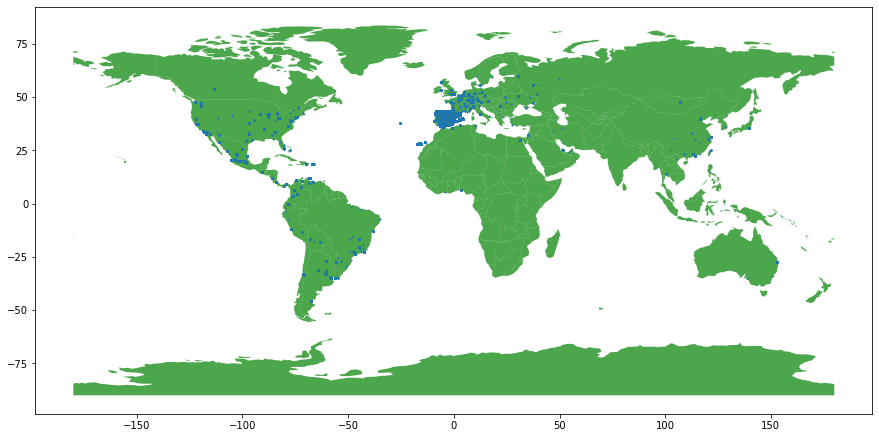

In [105]:
fig, ax = plt.subplots(figsize=(15,10))
world.plot(ax=ax, alpha=0.7, color="green")
gdf[['Peticio', 'geometry']].plot(ax=ax, markersize=0.5)
plt.show()

In [38]:
logGeoDesc

,IP,HOST,FECHA,Peticio,Pet,Protocol,ServerRespCode,Client,RevBytes,ip,country_name,city,latitude,longitude
0,66.249.76.216,www.akumenius.com,[23/Feb/2014:03:10:31 +0100],GET,/hoteles-baratos/ofertas-hotel-Club-&-Hotel-Letoonia--en-Fethiye-8460b-destinos.html,HTTP/1.1,404,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html),3100,66.249.76.216,United States,Mountain View,37.419159,-122.075409
1,66.249.76.216,www.akumenius.com,[23/Feb/2014:03:10:33 +0100],GET,/hoteles-baratos/ofertas-hotel-Metropolis-Hotel-en-Kaunas-210244b-destinos.html,HTTP/1.1,404,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html),3100,66.249.76.216,United States,Mountain View,37.419159,-122.075409
2,66.249.76.216,www.akumenius.com,[23/Feb/2014:03:10:35 +0100],GET,/hoteles-baratos/ofertas-hotel-Faena-Hotel-Buenos-Aires-en-Downtown-129723b-destinos.html,HTTP/1.1,404,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html),3100,66.249.76.216,United States,Mountain View,37.419159,-122.075409
3,66.249.76.216,www.akumenius.com,[23/Feb/2014:03:10:38 +0100],GET,/hoteles-baratos/ofertas-hotel-Kensington-Townhouse-London-en-Kensington-54356b-destinos.html,HTTP/1.1,404,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html),3100,66.249.76.216,United States,Mountain View,37.419159,-122.075409
4,66.249.76.216,www.akumenius.com,[23/Feb/2014:03:10:39 +0100],GET,/destinos-baratos/destinosEstrelles/hoteles-en-Invermere_CANAD%C3%81-con-4-estrellas,HTTP/1.1,200,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html),8811,66.249.76.216,United States,Mountain View,37.419159,-122.075409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247976,217.174.248.179,localhost,[02/Mar/2014:02:34:43 +0100],POST,/cgi-bin/php4?%2D%64+%61%6C%6C%6F%77%5F%75%72%6C%5F%69%6E%63%6C%75%64%65%3D%6F%6E+%2D%64+%73%61%66%65%5F%6D%6F%64%65%3D%6F%66%66+%2D%64+%73%75%68%6F%73%69%6E%2E%73%69%6D%75%6C%61%74%69%6F%6E%3D%6F%6E+%2D%64+%64%69%73%61%62%6C%65%5F%66%75%6E%63%74%69%6F%6E%73%3D%22%22+%2D%64+%6F%70%65%6E%5F%62%61%73%65%64%69%72%3D%6E%6F%6E%65+%2D%64+%61%75%74%6F%5F%70%72%65%70%65%6E%64%5F%66%69%6C%65%3D%70%68%70%3A%2F%2F%69%6E%70%75%74+%2D%64+%63%67%69%2E%66%6F%72%63%65%5F%72%65%64%69%72%65%63%74%3D%30+%2D%64+%63%67%69%2E%72%65%64%69%72%65%63%74%5F%73%74%61%74%75%73%5F%65%6E%76%3D%30+%2D%6E,HTTP/1.1,403,"Mozilla/5.0 (iPad; CPU OS 6_0 like Mac OS X) AppleWebKit/536.26(KHTML, like Gecko) Version/6.0 Mobile/10A5355d Safari/8536.25",278,217.174.248.179,United Kingdom,Gloucester,51.858330,-2.218610
247977,217.174.248.179,localhost,[02/Mar/2014:02:34:43 +0100],POST,/?%2D%64+%61%6C%6C%6F%77%5F%75%72%6C%5F%69%6E%63%6C%75%64%65%3D%6F%6E+%2D%64+%73%61%66%65%5F%6D%6F%64%65%3D%6F%66%66+%2D%64+%73%75%68%6F%73%69%6E%2E%73%69%6D%75%6C%61%74%69%6F%6E%3D%6F%6E+%2D%64+%64%69%73%61%62%6C%65%5F%66%75%6E%63%74%69%6F%6E%73%3D%22%22+%2D%64+%6F%70%65%6E%5F%62%61%73%65%64%69%72%3D%6E%6F%6E%65+%2D%64+%61%75%74%6F%5F%70%72%65%70%65%6E%64%5F%66%69%6C%65%3D%70%68%70%3A%2F%2F%69%6E%70%75%74+%2D%64+%63%67%69%2E%66%6F%72%63%65%5F%72%65%64%69%72%65%63%74%3D%30+%2D%64+%63%67%69%2E%72%65%64%69%72%65%63%74%5F%73%74%61%74%75%73%5F%65%6E%76%3D%30+%2D%6E,HTTP/1.1,403,"Mozilla/5.0 (iPad; CPU OS 6_0 like Mac OS X) AppleWebKit/536.26(KHTML, like Gecko) Version/6.0 Mobile/10A5355d Safari/8536.25",266,217.174.248.179,United Kingdom,Gloucester,51.858330,-2.218610
247978,188.135.173.80,www.akumenius.com,[02/Mar/2014:02:44:08 +0100],GET,/destinos-baratos/hoteles-en-Alvor_PORTUGAL,HTTP/1.0,200,"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1500.71 Safari/537.36",21144,188.135.173.80,Italy,Montebelluna,45.825699,12.054380
247979,188.135.173.80,www.akumenius.com,[02/Mar/2014:02:44:09 +0100],GET,/destinos-baratos/hoteles-baratos/ofertas-hotel-Pestana-Alvor-Atlantico-Residences-Beach-Suites-en-Alvor_PORTUGAL-1873b-destinos.html,HTTP/1.0,200,"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.

- Exercici 3

Mostra'm la teva creativitat, Sorprèn-me fes un pas més enllà amb l'anàlisi anterior.

In [47]:
ps1=logGeoDesc.groupby('country_name')['country_name'].count()

In [46]:
ps2=logGeoDesc['country_name'].value_counts()

In [57]:
prs1=ps1.sort_values(ascending=False).head(10)

In [52]:
ps2.sort_values(ascending=False)

Spain            149288
United States     71178
China              7010
Netherlands        6300
Germany            2053
                  ...  
Greece                1
Singapore             1
Vietnam               1
Macedonia             1
Indonesia             1
Name: country_name, Length: 64, dtype: int64

In [53]:
import matplotlib.pyplot as plt

In [61]:
prs1.head()

country_name
Spain            149288
United States     71178
China              7010
Netherlands        6300
Germany            2053
Name: country_name, dtype: int64

In [91]:
logGeoDesc.groupby('country_name').count()


,IP,HOST,FECHA,Peticio,Pet,Protocol,ServerRespCode,Client,RevBytes,ip,city,latitude,longitude
country_name,,,,,,,,,,,,,
Algeria,119,119,119,119,118,118,119,119,119,119,119,119,119
Andorra,173,173,173,173,173,173,173,173,173,173,173,173,173
Argentina,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007
Australia,82,82,82,82,82,82,82,82,82,82,82,82,82
Austria,224,224,224,224,223,223,224,224,224,224,224,224,224
...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,853,853,853,853,853,853,853,853,853,853,853,853,853
United States,71178,71178,71178,71178,71172,71172,71178,71178,71178,71178,71046,71178,71178
Uruguay,242,242,242,242,242,242,242,242,242,242,242,242,242


In [128]:
cnt=logGeoDesc.groupby('country_name').agg(['count'])['IP']
cnt

,count
country_name,
Algeria,119
Andorra,173
Argentina,1007
Australia,82
Austria,224
...,...
United Kingdom,853
United States,71178
Uruguay,242


In [113]:
cnt10=cnt.sort_values(by=['count'], ascending=False).head(10)

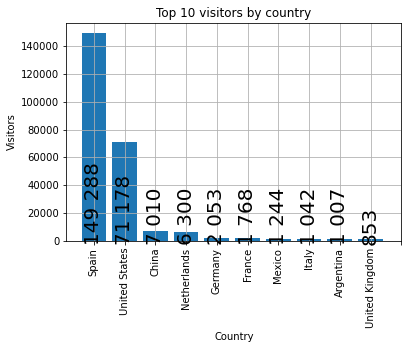

In [315]:
plt.bar(cnt10.index,cnt10['count'])
plt.xticks(range(0,11),rotation='vertical')
plt.grid()
plt.xlabel("Country")
plt.ylabel("Visitors")
for index,value in enumerate(cnt10['count']):
  plt.text(index,
           10, 
           '{0:,}'.format(round(value)).replace(',', ' '),
           rotation='vertical',
           size=20, 
           color='black',
           ha='center')
plt.title('Top 10 visitors by country')
plt.show()

Analisis por el tipo de peticion

In [149]:
peticiones = (logGeoDesc[['Peticio', 'HOST']].groupby('Peticio').count())

peticiones

,HOST
Peticio,
-,37
GET,229482
HEAD,1788
POST,16669
\x80w\x01\x03\x01,5


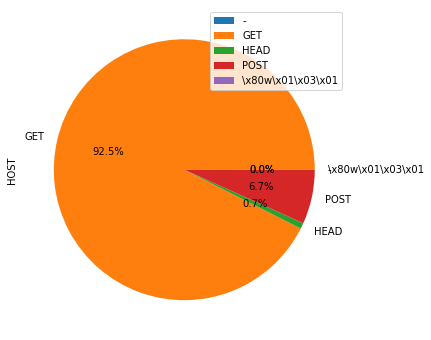

In [155]:
plot = peticiones.plot.pie(y='HOST',subplots=True, figsize=(11, 6), autopct='%1.1f%%')

In [270]:
logGeoDesc['FECHA']= pd.to_datetime(logGeoDesc['FECHA'], format='[%d/%b/%Y:%H:%M:%S %z]')

In [163]:
logGeoDesc

,IP,HOST,FECHA,Peticio,Pet,Protocol,ServerRespCode,Client,RevBytes,ip,country_name,city,latitude,longitude
0,66.249.76.216,www.akumenius.com,[23/Feb/2014:03:10:31 +0100],GET,/hoteles-baratos/ofertas-hotel-Club-&-Hotel-Letoonia--en-Fethiye-8460b-destinos.html,HTTP/1.1,404,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html),3100,66.249.76.216,United States,Mountain View,37.419159,-122.075409
1,66.249.76.216,www.akumenius.com,[23/Feb/2014:03:10:33 +0100],GET,/hoteles-baratos/ofertas-hotel-Metropolis-Hotel-en-Kaunas-210244b-destinos.html,HTTP/1.1,404,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html),3100,66.249.76.216,United States,Mountain View,37.419159,-122.075409
2,66.249.76.216,www.akumenius.com,[23/Feb/2014:03:10:35 +0100],GET,/hoteles-baratos/ofertas-hotel-Faena-Hotel-Buenos-Aires-en-Downtown-129723b-destinos.html,HTTP/1.1,404,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html),3100,66.249.76.216,United States,Mountain View,37.419159,-122.075409
3,66.249.76.216,www.akumenius.com,[23/Feb/2014:03:10:38 +0100],GET,/hoteles-baratos/ofertas-hotel-Kensington-Townhouse-London-en-Kensington-54356b-destinos.html,HTTP/1.1,404,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html),3100,66.249.76.216,United States,Mountain View,37.419159,-122.075409
4,66.249.76.216,www.akumenius.com,[23/Feb/2014:03:10:39 +0100],GET,/destinos-baratos/destinosEstrelles/hoteles-en-Invermere_CANAD%C3%81-con-4-estrellas,HTTP/1.1,200,Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html),8811,66.249.76.216,United States,Mountain View,37.419159,-122.075409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247976,217.174.248.179,localhost,[02/Mar/2014:02:34:43 +0100],POST,/cgi-bin/php4?%2D%64+%61%6C%6C%6F%77%5F%75%72%6C%5F%69%6E%63%6C%75%64%65%3D%6F%6E+%2D%64+%73%61%66%65%5F%6D%6F%64%65%3D%6F%66%66+%2D%64+%73%75%68%6F%73%69%6E%2E%73%69%6D%75%6C%61%74%69%6F%6E%3D%6F%6E+%2D%64+%64%69%73%61%62%6C%65%5F%66%75%6E%63%74%69%6F%6E%73%3D%22%22+%2D%64+%6F%70%65%6E%5F%62%61%73%65%64%69%72%3D%6E%6F%6E%65+%2D%64+%61%75%74%6F%5F%70%72%65%70%65%6E%64%5F%66%69%6C%65%3D%70%68%70%3A%2F%2F%69%6E%70%75%74+%2D%64+%63%67%69%2E%66%6F%72%63%65%5F%72%65%64%69%72%65%63%74%3D%30+%2D%64+%63%67%69%2E%72%65%64%69%72%65%63%74%5F%73%74%61%74%75%73%5F%65%6E%76%3D%30+%2D%6E,HTTP/1.1,403,"Mozilla/5.0 (iPad; CPU OS 6_0 like Mac OS X) AppleWebKit/536.26(KHTML, like Gecko) Version/6.0 Mobile/10A5355d Safari/8536.25",278,217.174.248.179,United Kingdom,Gloucester,51.858330,-2.218610
247977,217.174.248.179,localhost,[02/Mar/2014:02:34:43 +0100],POST,/?%2D%64+%61%6C%6C%6F%77%5F%75%72%6C%5F%69%6E%63%6C%75%64%65%3D%6F%6E+%2D%64+%73%61%66%65%5F%6D%6F%64%65%3D%6F%66%66+%2D%64+%73%75%68%6F%73%69%6E%2E%73%69%6D%75%6C%61%74%69%6F%6E%3D%6F%6E+%2D%64+%64%69%73%61%62%6C%65%5F%66%75%6E%63%74%69%6F%6E%73%3D%22%22+%2D%64+%6F%70%65%6E%5F%62%61%73%65%64%69%72%3D%6E%6F%6E%65+%2D%64+%61%75%74%6F%5F%70%72%65%70%65%6E%64%5F%66%69%6C%65%3D%70%68%70%3A%2F%2F%69%6E%70%75%74+%2D%64+%63%67%69%2E%66%6F%72%63%65%5F%72%65%64%69%72%65%63%74%3D%30+%2D%64+%63%67%69%2E%72%65%64%69%72%65%63%74%5F%73%74%61%74%75%73%5F%65%6E%76%3D%30+%2D%6E,HTTP/1.1,403,"Mozilla/5.0 (iPad; CPU OS 6_0 like Mac OS X) AppleWebKit/536.26(KHTML, like Gecko) Version/6.0 Mobile/10A5355d Safari/8536.25",266,217.174.248.179,United Kingdom,Gloucester,51.858330,-2.218610
247978,188.135.173.80,www.akumenius.com,[02/Mar/2014:02:44:08 +0100],GET,/destinos-baratos/hoteles-en-Alvor_PORTUGAL,HTTP/1.0,200,"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1500.71 Safari/537.36",21144,188.135.173.80,Italy,Montebelluna,45.825699,12.054380
247979,188.135.173.80,www.akumenius.com,[02/Mar/2014:02:44:09 +0100],GET,/destinos-baratos/hoteles-baratos/ofertas-hotel-Pestana-Alvor-Atlantico-Residences-Beach-Suites-en-Alvor_PORTUGAL-1873b-destinos.html,HTTP/1.0,200,"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.

Voy a ver por franjas horarias como se han distribuido las peticiones

In [271]:
logGeoDesc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247981 entries, 0 to 247980
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype                               
---  ------          --------------   -----                               
 0   IP              247981 non-null  object                              
 1   HOST            247981 non-null  object                              
 2   FECHA           247981 non-null  datetime64[ns, pytz.FixedOffset(60)]
 3   Peticio         247981 non-null  object                              
 4   Pet             247939 non-null  object                              
 5   Protocol        247939 non-null  object                              
 6   ServerRespCode  247981 non-null  object                              
 7   Client          247981 non-null  object                              
 8   RevBytes        247981 non-null  object                              
 9   ip              247981 non-null  object                    

Text(0, 0.5, 'Requests')

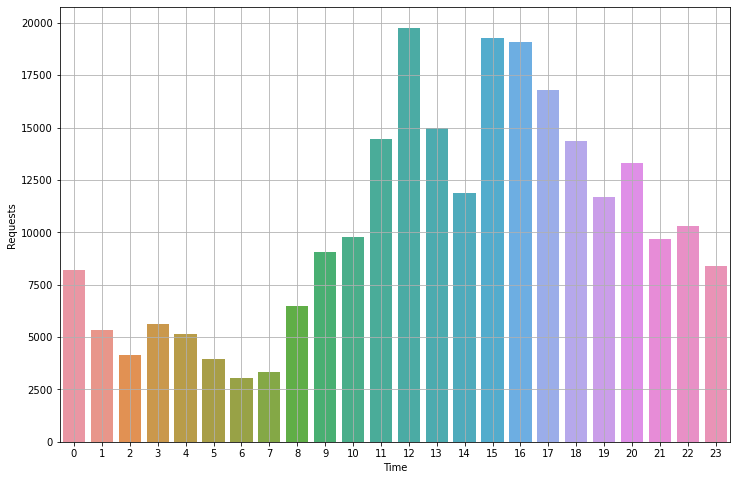

In [314]:


plt.figure(figsize=(12,8))
ax = sns.barplot(x=logGeoDesc.hora.value_counts().index, y=logGeoDesc.hora.value_counts(), data=logGeoDesc)
plt.grid()
plt.xlabel("Time")
plt.ylabel("Requests")

Desde la grafico puedo ver que entre las 6 a 7 de la madrugada habian menos peticiones
y los picos habían a las 12 de medio dia y a las 15 y 16 horas. A a hora de comer sobre las 14 habia una bajada del trafico :)